In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import category_encoders as ce
import warnings
import joblib
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('data_prep_sneha.csv', index_col = 0)
df.head()

,VISITOR_ID,VISIT_ID,VISIT_START_TIME,HIT_NUMBER,HOUR,EVENT_INFO_CATEGORY,EVENT_INFO_LABEL,DATA_SOURCE,E_COMMERCE_ACTION_ACTION_TYPE,CHANNEL_GROUPING,...,MIN_TOTAL_HITS,AVG_TOTAL_HITS,MAX_TOTAL_HITS,MIN_SESSION_LENGTH,AVG_SESSION_LENGTH,MAX_SESSION_LENGTH,MIN_SESSION_DURATION,AVG_SESSION_DURATION,MAX_SESSION_DURATION,AVG_MEAN_TIME_PER_PAGE
0,1.000000e+18,1576472248,2019-12-16 04:57:28+00:00,3,10,LeadCreated,Qxzq0dy160YY5z4waAwONAYEQLHlcL6I,web,5,(Other),...,0,0.0,0,0,0.0,0,0,0.0,0,0.0
1,1.000000e+18,1576417254,2019-12-15 13:40:54+00:00,4,19,LeadCreated,DxirjDCpfpB2_fSknwoUwsxiJFi-Is5D,web,5,Paid Search,...,0,0.0,0,0,0.0,0,0,0.0,0,0.0
2,1.000000e+18,1575364029,2019-12-03 09:07:09+00:00,22,14,LeadCreated,PHedaoKT-ibPv2YeRWlAp1dykXkikKdz,web,5,Paid Search,...,0,0.0,0,0,0.0,0,0,0.0,0,0.0
3,1.000000e+17,1575417798,2019-12-04 00:03:18+00:00,24,5,LeadCreated,iKEeM0mAH6mOnhtat6A9GzIIR2Cp0yum,web,5,Other Advertising,...,0,0.0,0,0,0.0,0,0,0.0,0,0.0
4,1.000000e+18,1575697916,2019-12-07 05:51:56+00:00,6,11,LeadCreated,_3rUGYLEeZRQaZb6kQ0lRiP5q5E_GXQ9,web,5,(Other),...,0,0.0,0,0,0.0,0,0,0.0,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94279 entries, 0 to 94278
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   VISITOR_ID                     94279 non-null  float64
 1   VISIT_ID                       94279 non-null  int64  
 2   VISIT_START_TIME               94279 non-null  object 
 3   HIT_NUMBER                     94279 non-null  int64  
 4   HOUR                           94279 non-null  int64  
 5   EVENT_INFO_CATEGORY            94279 non-null  object 
 6   EVENT_INFO_LABEL               94279 non-null  object 
 7   DATA_SOURCE                    94279 non-null  object 
 8   E_COMMERCE_ACTION_ACTION_TYPE  94279 non-null  int64  
 9   CHANNEL_GROUPING               94279 non-null  object 
 10  TOTAL_HITS                     94279 non-null  int64  
 11  TOTAL_PAGEVIEWS                94279 non-null  int64  
 12  TOTAL_TIME_ON_SITE             94279 non-null 

In [4]:
df = df.drop(['VISIT_START_TIME', 'DATA_SOURCE', 'EVENT_INFO_CATEGORY', 'E_COMMERCE_ACTION_ACTION_TYPE', 'EVENT_INFO_LABEL', 'TRAFFIC_SOURCE_CAMPAIGN', 'HIT_NUMBER'], axis = 1)

In [5]:
df.shape

(94279, 65)

## Channel Grouping

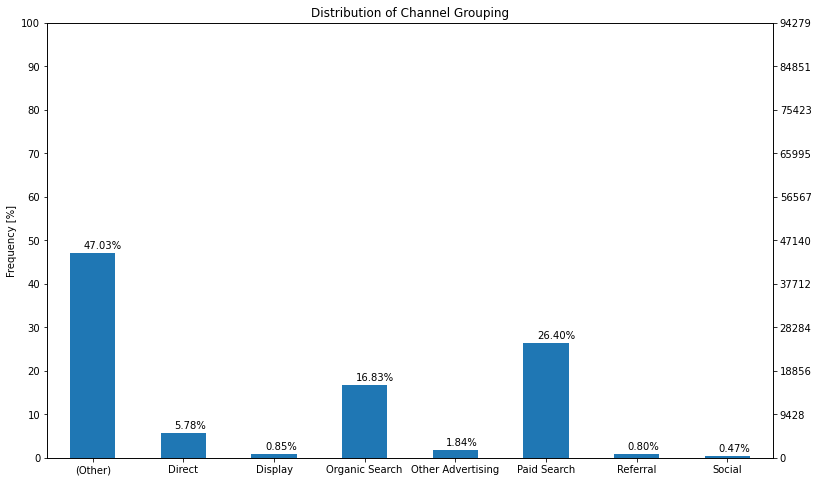

In [6]:
plt.figure(figsize = (13, 8))
plt.title('Distribution of Channel Grouping')
plt.ylabel('Frequency [%]')

ax = (df.CHANNEL_GROUPING.value_counts()/len(df)*100).sort_index().plot(kind = "bar", rot = 0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

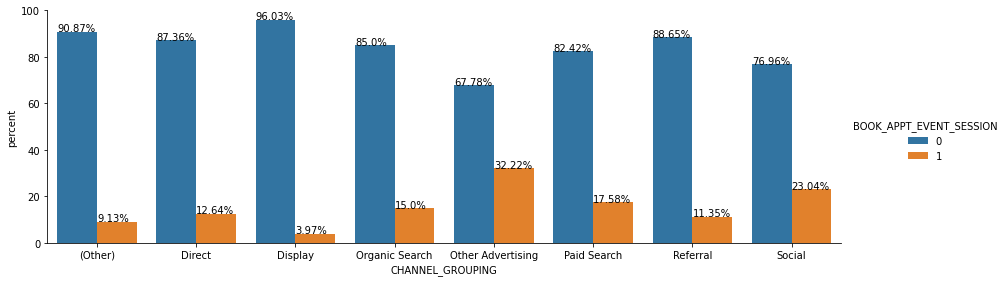

In [7]:
x, y = 'CHANNEL_GROUPING', 'BOOK_APPT_EVENT_SESSION' 
df1 = df.groupby('CHANNEL_GROUPING')['BOOK_APPT_EVENT_SESSION'].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = x, y = 'percent',hue = y, kind = 'bar', data = df1, height = 4, aspect = 3)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

## TRAFFIC SOURCE

BOOK_APPT_EVENT_SESSION                      0         1
TRAFFIC_SOURCE_SOURCE                                   
(direct)                              0.873646  0.126354
CRM                                   0.828910  0.171090
CRM_C2B                               0.600000  0.400000
CRM_CC_PCNA                           1.000000  0.000000
FACEBOOK                              0.666667  0.333333
...                                        ...       ...
www-team--bhp-com.cdn.ampproject.org  1.000000  0.000000
yahoo                                 0.964286  0.035714
youtube.com                           0.857143  0.142857
zapmeta.co.in                         0.666667  0.333333
zip_of_life                           0.500000  0.500000

[105 rows x 2 columns]


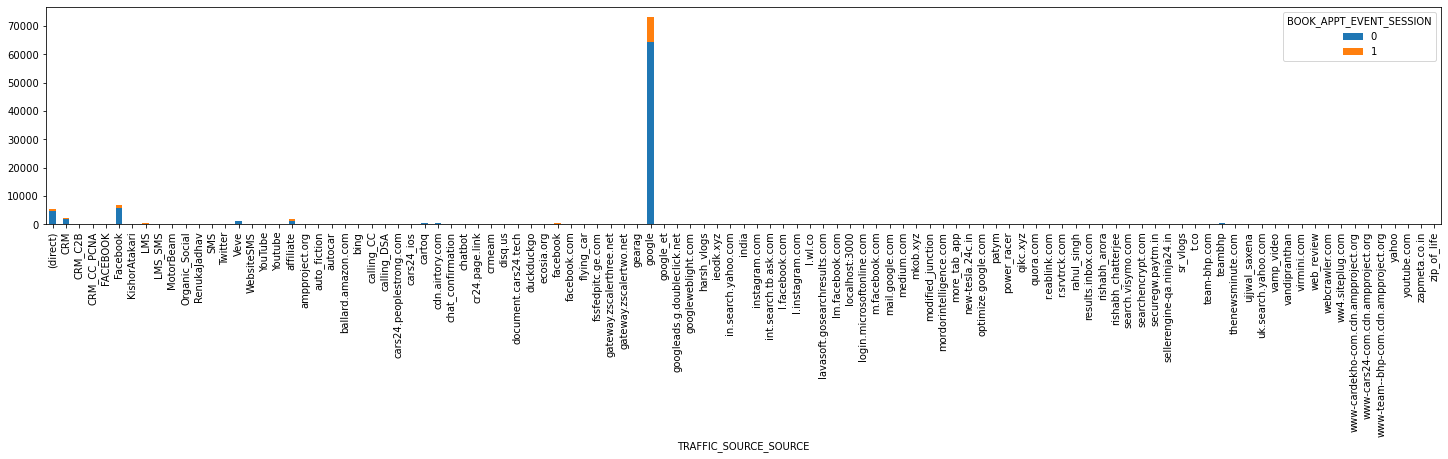

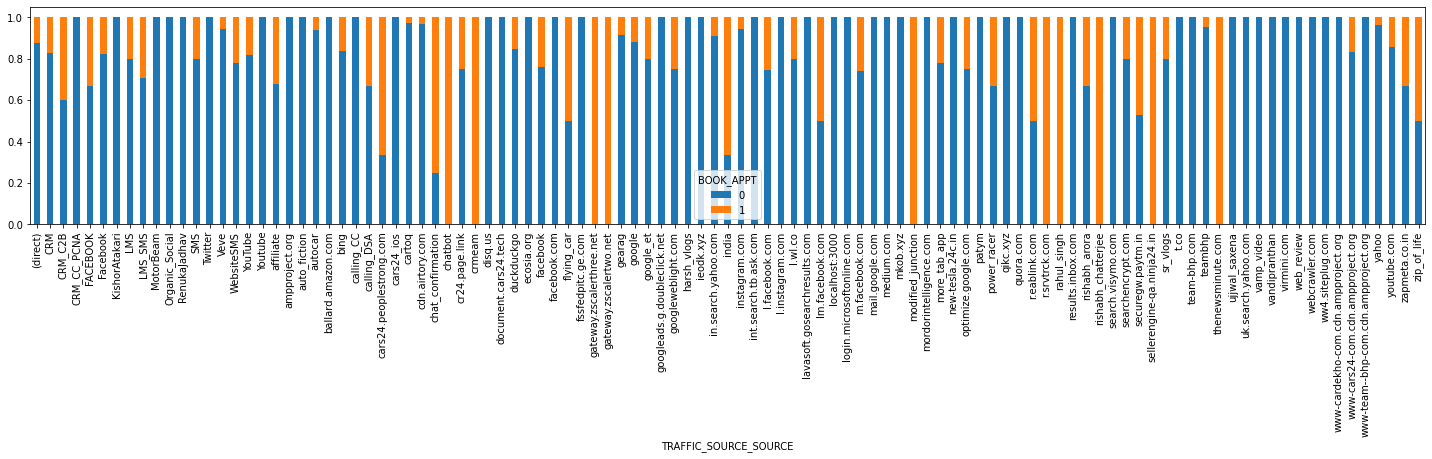

In [8]:
plt.rc('figure', figsize = (25, 4))
ct = pd.crosstab(df.TRAFFIC_SOURCE_SOURCE, df.BOOK_APPT_EVENT_SESSION)

print(ct.astype('float').div(ct.sum(axis=1), axis=0))

t = ct.astype('float').div(ct.sum(axis=1), axis=0)

ct.plot.bar(stacked = True)
t.plot.bar(stacked = True)

plt.legend(title = 'BOOK_APPT')

plt.show()

## TRAFFIC SOURCE MEDIUM

In [9]:
df['TRAFFIC_SOURCE_MEDIUM'].value_counts()

adwords                  33972
cpc                      24887
organic                  15869
(none)                    5445
cpv                       1732
                         ...  
ACQ_Conversion_Mumbai        1
need-help-flow               1
Youtube                      1
Lead Ad - Nasik_25Feb        1
sms                          1
Name: TRAFFIC_SOURCE_MEDIUM, Length: 88, dtype: int64

BOOK_APPT_EVENT_SESSION                               0         1
TRAFFIC_SOURCE_MEDIUM                                            
(none)                                         0.873646  0.126354
(not set)                                      0.757143  0.242857
ACQ_COnversion_Cars24 - Website Audience – LA  0.777778  0.222222
ACQ_COnversion_Magagine_Non_Core_16_Dec        1.000000  0.000000
ACQ_Conversion_All_City_CPC – Interest Wise    0.866667  0.133333
...                                                 ...       ...
search                                         0.933333  0.066667
sms                                            1.000000  0.000000
whatsapp                                       0.827778  0.172222
widget                                         0.957447  0.042553
youtube                                        0.666667  0.333333

[88 rows x 2 columns]


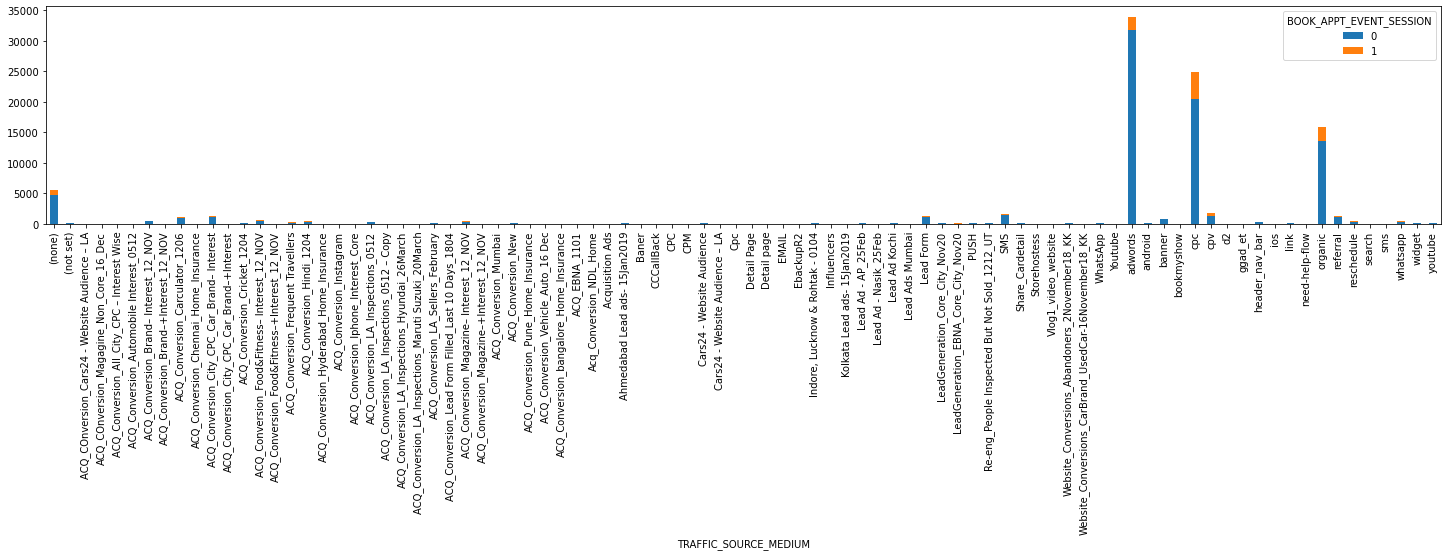

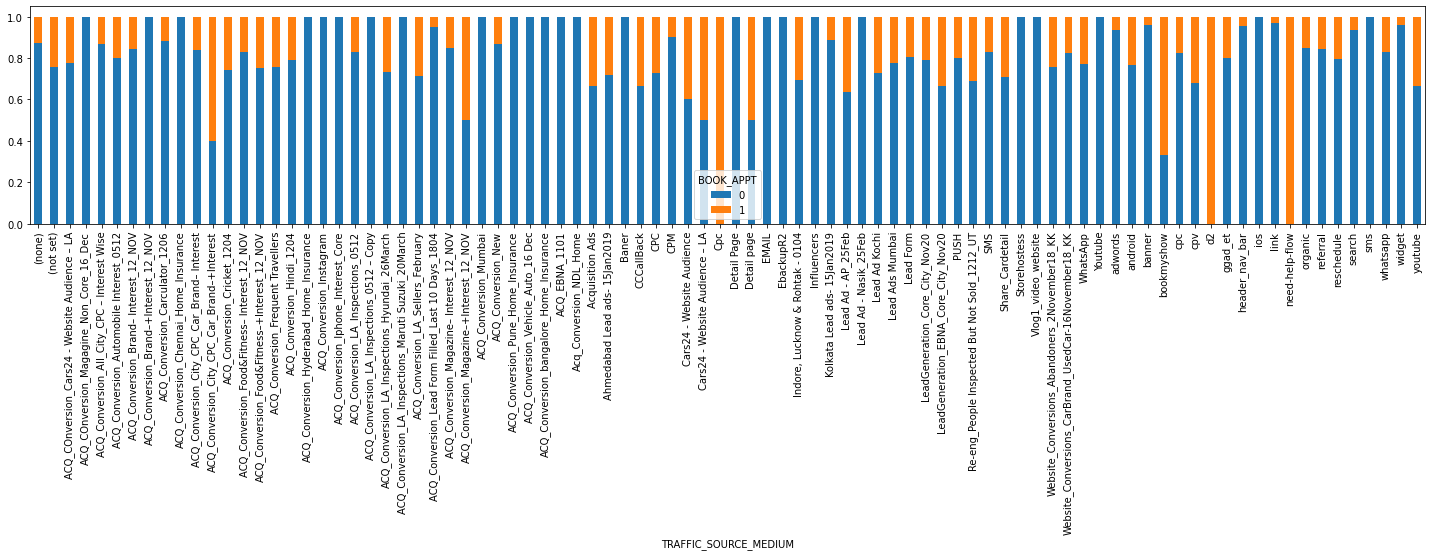

In [10]:
plt.rc('figure', figsize = (25, 4))
ct = pd.crosstab(df.TRAFFIC_SOURCE_MEDIUM, df.BOOK_APPT_EVENT_SESSION)

print(ct.astype('float').div(ct.sum(axis = 1), axis = 0))

t = ct.astype('float').div(ct.sum(axis = 1), axis = 0)

ct.plot.bar(stacked = True)
t.plot.bar(stacked = True)

plt.legend(title = 'BOOK_APPT')

plt.show()

## COUNT OF BOOK APPT WITHIN THE SESSION

In [11]:
df['BOOK_APPT_EVENT_SESSION'].value_counts()

0    82007
1    12272
Name: BOOK_APPT_EVENT_SESSION, dtype: int64

In [12]:
booked = (sum(df['BOOK_APPT_EVENT_SESSION'])/len(df['BOOK_APPT_EVENT_SESSION'].index))*100
booked

13.016684521473499

## DAY: 0: weekday, 1: Saturday  2: Sunday

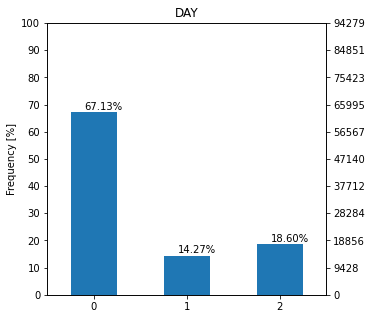

In [13]:
plt.figure(figsize = (5,5))
plt.title('DAY')
plt.ylabel('Frequency [%]')

ax = (df.DAY_SESSION.value_counts()/len(df)*100).sort_index().plot(kind = "bar", rot = 0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

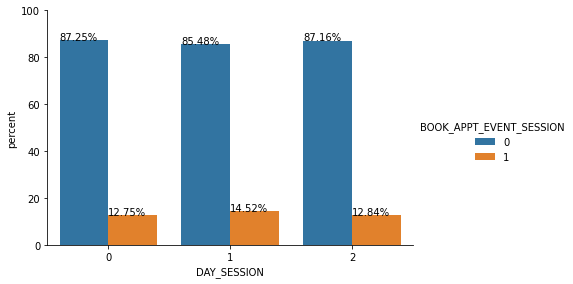

In [14]:
x, y = 'DAY_SESSION', 'BOOK_APPT_EVENT_SESSION' 
df1 = df.groupby('DAY_SESSION')['BOOK_APPT_EVENT_SESSION'].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = x, y = 'percent',hue = y, kind = 'bar', data = df1, height = 4, aspect = 1.5)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

## TYPE OF VISITOR: 0: New and 1: Returning

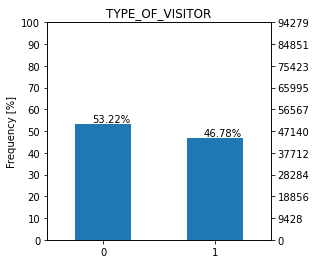

In [15]:
plt.figure(figsize = (4,4))
plt.title('TYPE_OF_VISITOR')
plt.ylabel('Frequency [%]')

ax = (df.TYPE_OF_VISITOR.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

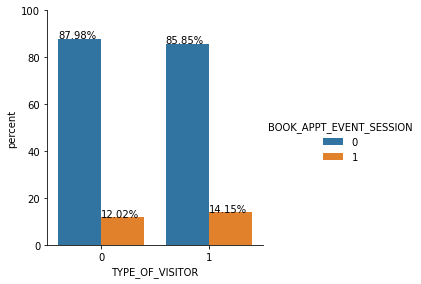

In [16]:
x, y = 'TYPE_OF_VISITOR', 'BOOK_APPT_EVENT_SESSION' 
df1 = df.groupby('TYPE_OF_VISITOR')['BOOK_APPT_EVENT_SESSION'].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = x, y = 'percent',hue = y, kind = 'bar', data = df1, height = 4, aspect = 1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

## TOTAL NUMBER OF VISITS

In [17]:
cut_bins = [0, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 1500]
df['TOTAL_NO_OF_VISITS_BIN'] = pd.cut(df['TOTAL_NO_OF_VISITS'], bins = cut_bins)

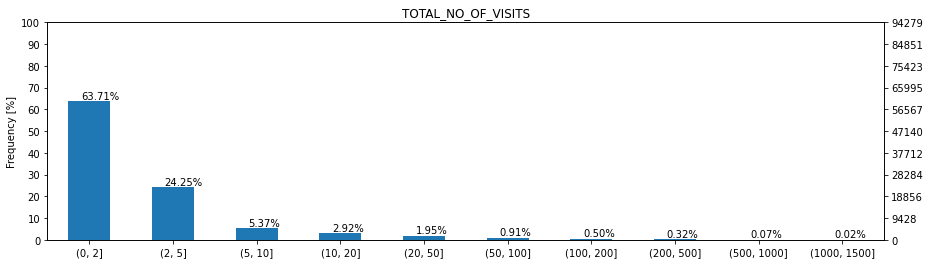

In [18]:
plt.figure(figsize = (15,4))
plt.title('TOTAL_NO_OF_VISITS')
plt.ylabel('Frequency [%]')

ax = (df.TOTAL_NO_OF_VISITS_BIN.value_counts()/len(df)*100).sort_index().plot(kind = "bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

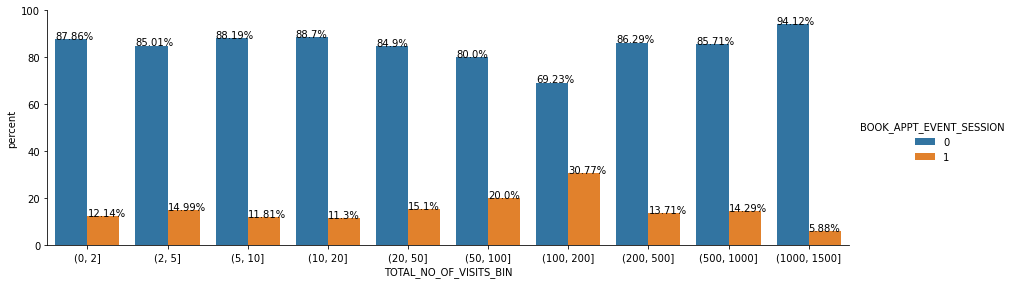

In [19]:
x, y = 'TOTAL_NO_OF_VISITS_BIN', 'BOOK_APPT_EVENT_SESSION' 
df1 = df.groupby('TOTAL_NO_OF_VISITS_BIN')['BOOK_APPT_EVENT_SESSION'].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = x, y = 'percent', hue = y, kind = 'bar', data = df1, height = 4, aspect = 3)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

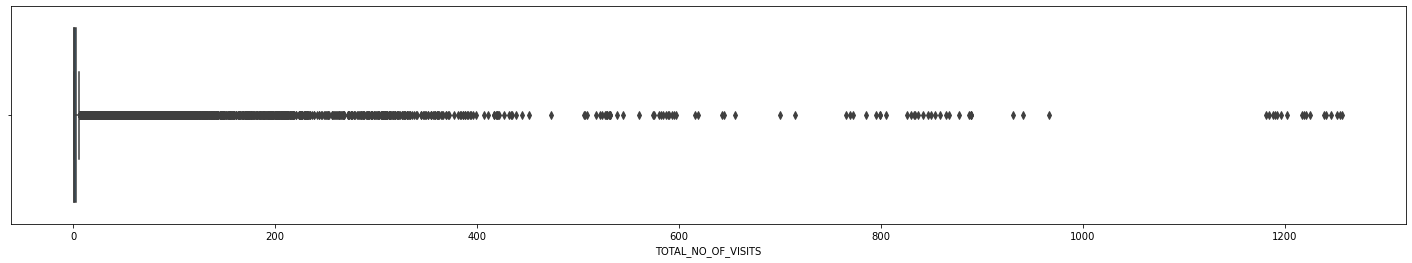

In [20]:
sns.boxplot(x = df['TOTAL_NO_OF_VISITS'])  

In [21]:
df['TOTAL_NO_OF_VISITS'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    94279.000000
mean         5.927959
std         31.923027
min          1.000000
5%           1.000000
25%          1.000000
50%          1.000000
75%          3.000000
90%          7.000000
95%         15.000000
99%         93.000000
max       1257.000000
Name: TOTAL_NO_OF_VISITS, dtype: float64

In [22]:
Q1 = df.TOTAL_NO_OF_VISITS.quantile(0.25)             
Q3 = df.TOTAL_NO_OF_VISITS.quantile(0.75)                    
IQR = Q3 - Q1                  
print(IQR) 

2.0


In [23]:
df['TOTAL_NO_OF_VISITS'] = df['TOTAL_NO_OF_VISITS'][~((df['TOTAL_NO_OF_VISITS'] < (Q1 - 1.5 * IQR)) |(df['TOTAL_NO_OF_VISITS'] > (Q3 + 1.5 * IQR)))]  

In [24]:
df = df.dropna(axis = 0, subset = ['TOTAL_NO_OF_VISITS'])

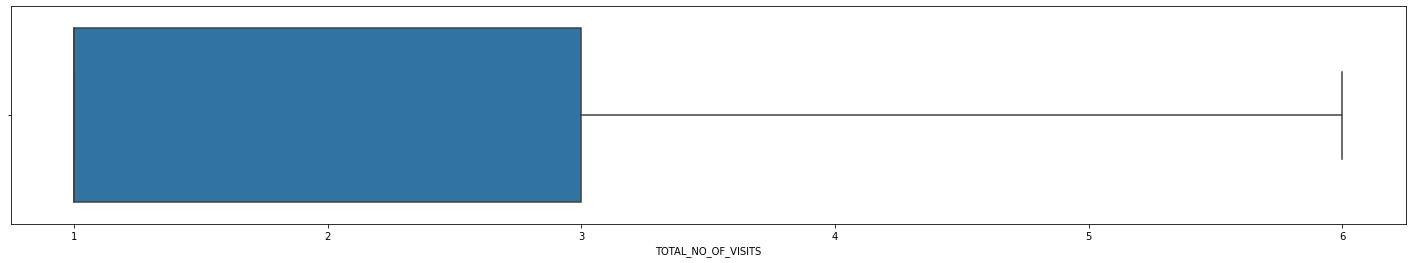

In [25]:
sns.boxplot(x = df['TOTAL_NO_OF_VISITS'])  

## ACCOUNT CREATED

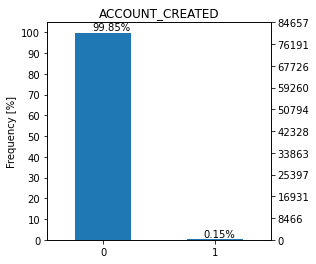

In [26]:
plt.figure(figsize = (4,4))
plt.title('ACCOUNT_CREATED')
plt.ylabel('Frequency [%]')

ax = (df.ACCOUNT_CREATED.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

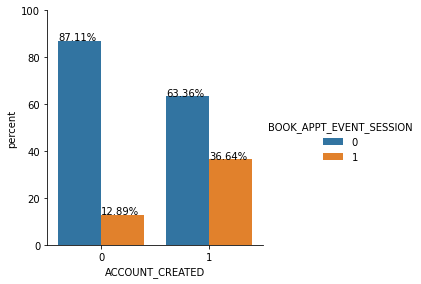

In [27]:
x, y = 'ACCOUNT_CREATED', 'BOOK_APPT_EVENT_SESSION' 
df1 = df.groupby('ACCOUNT_CREATED')['BOOK_APPT_EVENT_SESSION'].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = x, y = 'percent', hue = y, kind = 'bar', data = df1, height = 4, aspect = 1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [28]:
cut_bins = [0, 2, 3, 10, 20, 50, 100, 200]
df['TOTAL_PAGEVIEWS_BIN'] = pd.cut(df['TOTAL_PAGEVIEWS'], bins = cut_bins)

In [29]:
df['TOTAL_TIME_ON_SITE'] = df['TOTAL_TIME_ON_SITE'] /60

In [30]:
cut_bins = [0, 1, 3, 5, 8, 10, 30, 60, 120, 180]
df['TOTAL_TIME_ON_SITE_BIN'] = pd.cut(df['TOTAL_TIME_ON_SITE'], bins = cut_bins)

## TOTAL NUMBER OF PAGEVIEWS

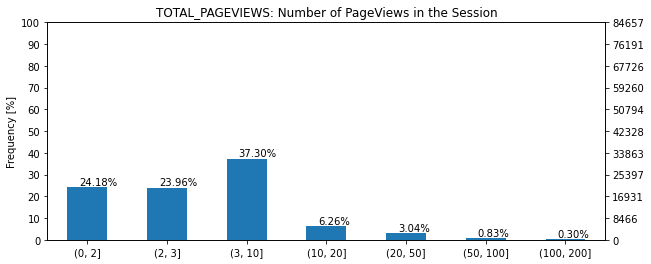

In [31]:
plt.figure(figsize = (10,4))
plt.title('TOTAL_PAGEVIEWS: Number of PageViews in the Session')
plt.ylabel('Frequency [%]')

ax = (df.TOTAL_PAGEVIEWS_BIN.value_counts()/len(df)*100).sort_index().plot(kind = "bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

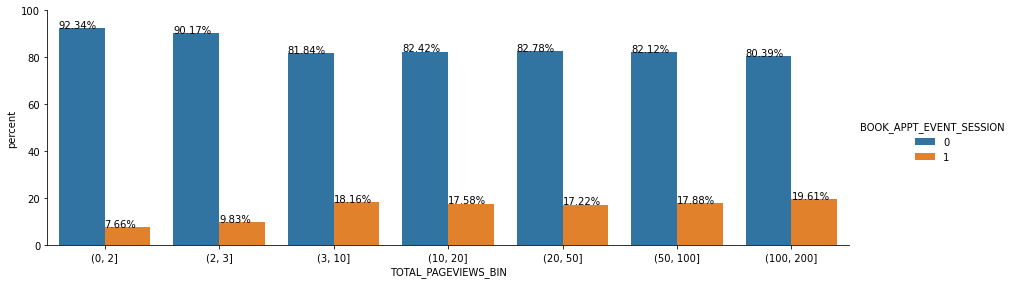

In [32]:
x, y = 'TOTAL_PAGEVIEWS_BIN', 'BOOK_APPT_EVENT_SESSION' 
df1 = df.groupby('TOTAL_PAGEVIEWS_BIN')['BOOK_APPT_EVENT_SESSION'].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = x, y = 'percent', hue = y, kind = 'bar', data = df1, height = 4, aspect = 3)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

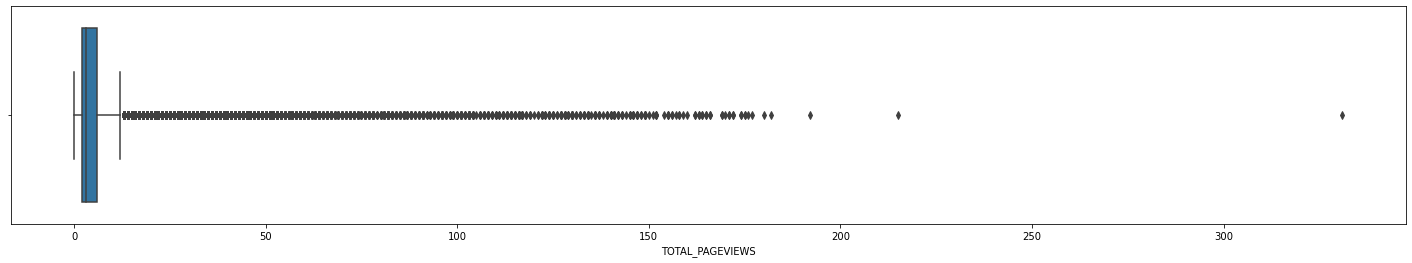

In [33]:
sns.boxplot(x = df['TOTAL_PAGEVIEWS'])  

In [34]:
df['TOTAL_PAGEVIEWS'].describe()

count    84657.000000
mean         6.075139
std         10.828597
min          0.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        331.000000
Name: TOTAL_PAGEVIEWS, dtype: float64

In [35]:
Q1 = df.TOTAL_PAGEVIEWS.quantile(0.25)             
Q3 = df.TOTAL_PAGEVIEWS.quantile(0.75)                    
IQR = Q3 - Q1                  
print(IQR) 

4.0


In [36]:
df['TOTAL_PAGEVIEWS'] = df['TOTAL_PAGEVIEWS'][~((df['TOTAL_PAGEVIEWS'] < (Q1 - 1.5 * IQR)) |(df['TOTAL_PAGEVIEWS'] > (Q3 + 1.5 * IQR)))]  
df = df.dropna(axis = 0, subset = ['TOTAL_PAGEVIEWS'])

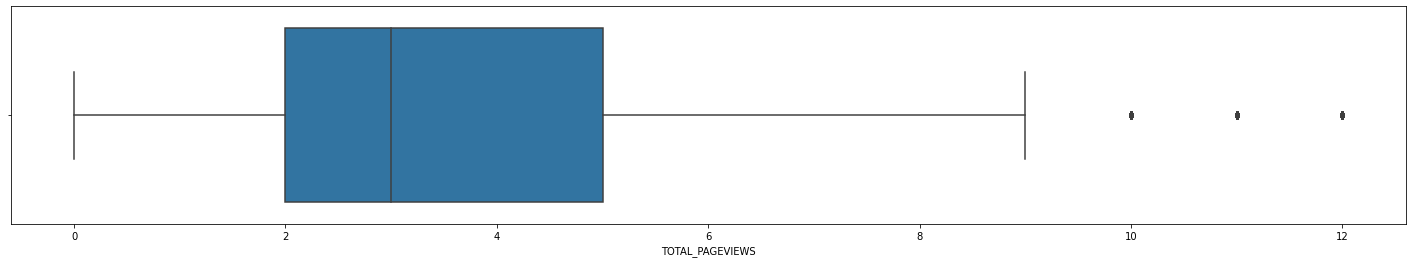

In [37]:
sns.boxplot(x = df['TOTAL_PAGEVIEWS'])  

## TOTAL TIME ON SITE

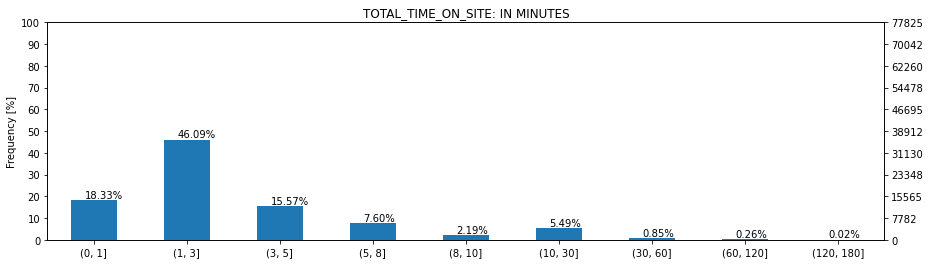

In [38]:
plt.figure(figsize = (15, 4))
plt.title('TOTAL_TIME_ON_SITE: IN MINUTES')
plt.ylabel('Frequency [%]')

ax = (df.TOTAL_TIME_ON_SITE_BIN.value_counts()/len(df)*100).sort_index().plot(kind = "bar", rot = 0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

posx and posy should be finite values
posx and posy should be finite values


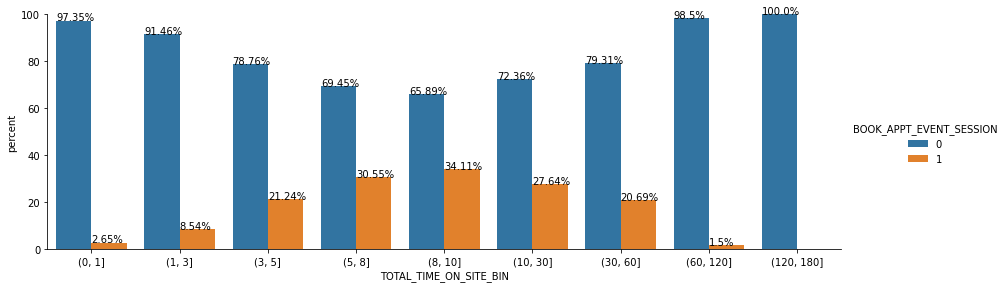

In [39]:
x, y = 'TOTAL_TIME_ON_SITE_BIN', 'BOOK_APPT_EVENT_SESSION' 
df1 = df.groupby('TOTAL_TIME_ON_SITE_BIN')['BOOK_APPT_EVENT_SESSION'].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = x, y = 'percent', hue = y, kind = 'bar', data = df1, height = 4, aspect = 3)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

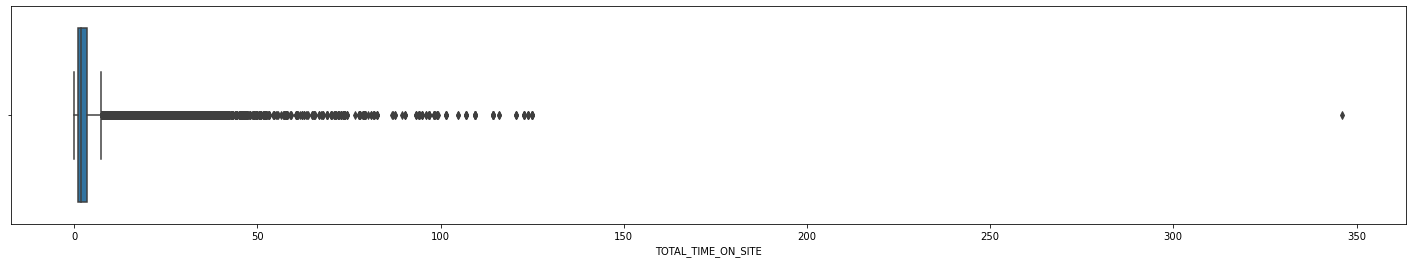

In [40]:
sns.boxplot(x = df['TOTAL_TIME_ON_SITE'])  

In [41]:
df['TOTAL_TIME_ON_SITE'].describe()

count    77825.000000
mean         3.744452
std          7.003365
min          0.000000
25%          1.100000
50%          2.000000
75%          3.650000
max        346.116667
Name: TOTAL_TIME_ON_SITE, dtype: float64

In [42]:
Q1 = df.TOTAL_TIME_ON_SITE.quantile(0.25)             
Q3 = df.TOTAL_TIME_ON_SITE.quantile(0.75)                    
IQR = Q3 - Q1                  
print(IQR) 

2.55


In [43]:
df['TOTAL_TIME_ON_SITE'] = df['TOTAL_TIME_ON_SITE'][~((df['TOTAL_TIME_ON_SITE'] < (Q1 - 1.5 * IQR)) |(df['TOTAL_TIME_ON_SITE'] > (Q3 + 1.5 * IQR)))]  
df = df.dropna(axis = 0, subset = ['TOTAL_TIME_ON_SITE'])

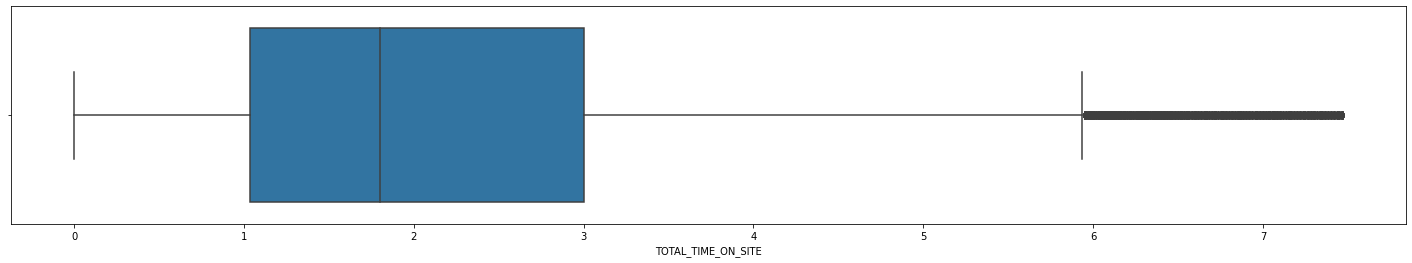

In [44]:
sns.boxplot(x = df['TOTAL_TIME_ON_SITE'])  

## MEAN TIME PER PAGE

In [45]:
df['MEAN_TIME_PER_PAGE_SESSION'] = df['MEAN_TIME_PER_PAGE_SESSION'] / 60

In [46]:
cut_bins = [0, 0.2, 1, 2, 4, 6, 8]
df['MEAN_TIME_PER_PAGE_SESSION_BIN'] = pd.cut(df['MEAN_TIME_PER_PAGE_SESSION'], bins = cut_bins)

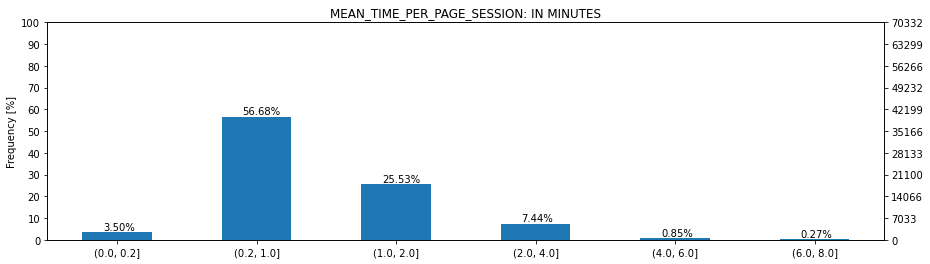

In [47]:
plt.figure(figsize = (15, 4))
plt.title('MEAN_TIME_PER_PAGE_SESSION: IN MINUTES')
plt.ylabel('Frequency [%]')

ax = (df.MEAN_TIME_PER_PAGE_SESSION_BIN.value_counts()/len(df)*100).sort_index().plot(kind = "bar", rot = 0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

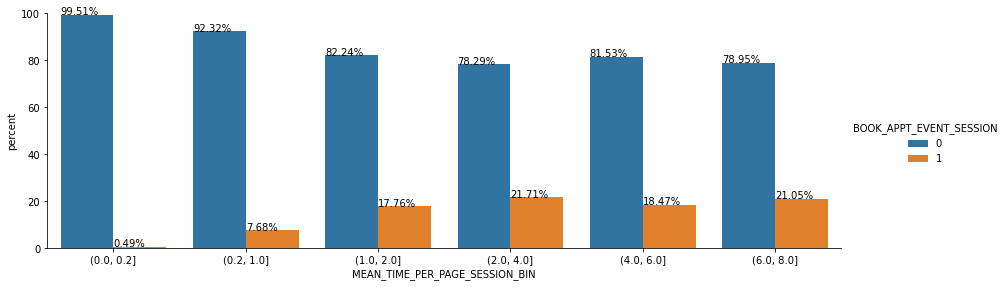

In [48]:
x, y = 'MEAN_TIME_PER_PAGE_SESSION_BIN', 'BOOK_APPT_EVENT_SESSION' 
df1 = df.groupby('MEAN_TIME_PER_PAGE_SESSION_BIN')['BOOK_APPT_EVENT_SESSION'].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = x, y = 'percent', hue = y, kind = 'bar', data = df1, height = 4, aspect = 3)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

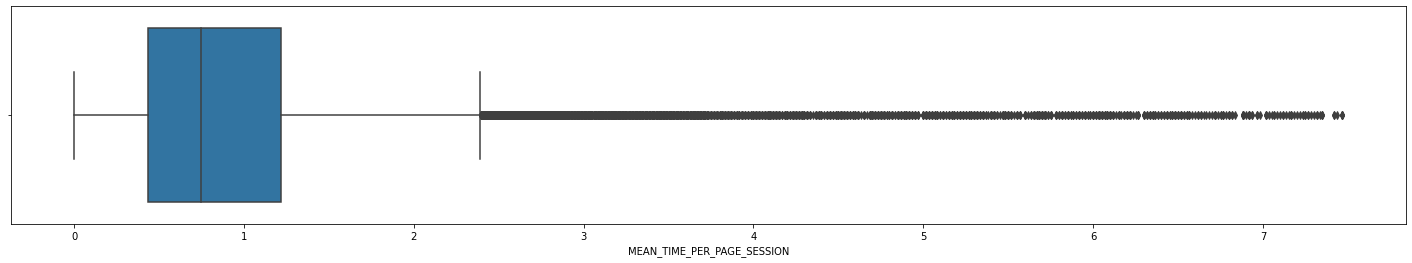

In [49]:
sns.boxplot(x = df['MEAN_TIME_PER_PAGE_SESSION'])  

In [50]:
df['MEAN_TIME_PER_PAGE_SESSION'].describe()

count    70332.000000
mean         0.948539
std          0.826744
min          0.000000
25%          0.433333
50%          0.750000
75%          1.216667
max          7.466667
Name: MEAN_TIME_PER_PAGE_SESSION, dtype: float64

In [51]:
Q1 = df.MEAN_TIME_PER_PAGE_SESSION.quantile(0.25)             
Q3 = df.MEAN_TIME_PER_PAGE_SESSION.quantile(0.75)                    
IQR = Q3 - Q1                  
print(IQR)

0.7833333333333332


In [52]:
df['MEAN_TIME_PER_PAGE_SESSION'] = df['MEAN_TIME_PER_PAGE_SESSION'][~((df['MEAN_TIME_PER_PAGE_SESSION'] < (Q1 - 1.5 * IQR)) |(df['MEAN_TIME_PER_PAGE_SESSION'] > (Q3 + 1.5 * IQR)))]  
df = df.dropna(axis = 0, subset = ['MEAN_TIME_PER_PAGE_SESSION'])

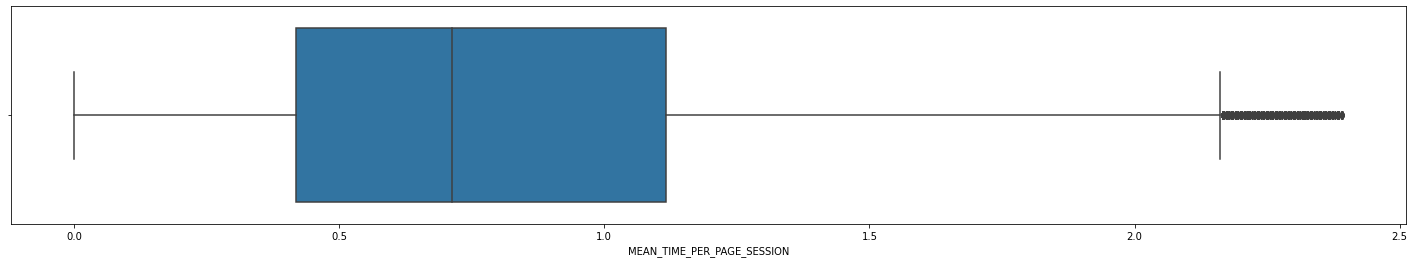

In [53]:
sns.boxplot(x = df['MEAN_TIME_PER_PAGE_SESSION'])  

## FGVGE CHART

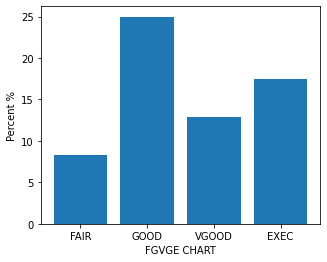

In [54]:
plt.figure(figsize = (5, 4))
FAIR = (df['FGVGECHART_FAIR_SESSION'].sum(axis=0) / len(df)) * 100
GOOD = (df['FGVGECHART_GOOD_SESSION'].sum(axis=0) / len(df)) * 100
VGOOD = (df['FGVGECHART_VGOOD_SESSION'].sum(axis=0) / len(df)) * 100
EXEC = (df['FGVGECHART_EXEC_SESSION'].sum(axis=0) / len(df)) * 100

x = ['FAIR', 'GOOD', 'VGOOD', 'EXEC']
y = [FAIR, GOOD, VGOOD, EXEC]

plt.bar(x, height = y)
plt.xlabel('FGVGE CHART')
plt.ylabel('Percent %')

plt.show()

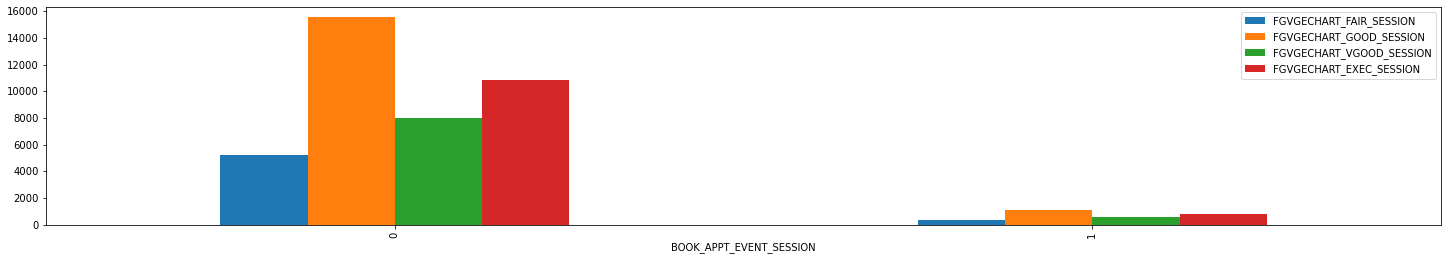

In [55]:
d = df[['BOOK_APPT_EVENT_SESSION', 'FGVGECHART_FAIR_SESSION', 'FGVGECHART_GOOD_SESSION', 'FGVGECHART_VGOOD_SESSION', 'FGVGECHART_EXEC_SESSION']].groupby(['BOOK_APPT_EVENT_SESSION']).sum() 
d.plot.bar()

plt.show()

## COUNT OF LEAD CREATED

In [56]:
cut_bins = [0, 1, 2, 5, 10]
df['COUNT_LEAD_CREATED_SESSION_BIN'] = pd.cut(df['COUNT_LEAD_CREATED_SESSION'], bins = cut_bins)

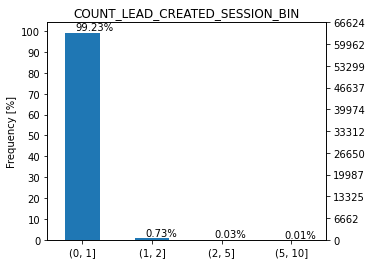

In [57]:
plt.figure(figsize = (5, 4))
plt.title('COUNT_LEAD_CREATED_SESSION_BIN')
plt.ylabel('Frequency [%]')

ax = (df.COUNT_LEAD_CREATED_SESSION_BIN.value_counts()/len(df)*100).sort_index().plot(kind = "bar", rot = 0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

posx and posy should be finite values
posx and posy should be finite values


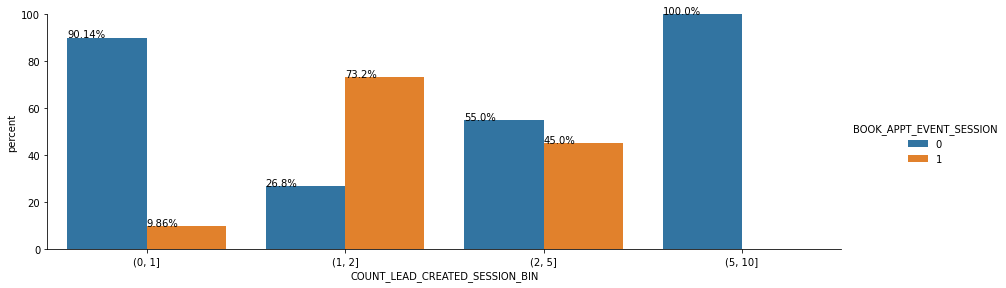

In [58]:
x, y = 'COUNT_LEAD_CREATED_SESSION_BIN', 'BOOK_APPT_EVENT_SESSION' 
df1 = df.groupby('COUNT_LEAD_CREATED_SESSION_BIN')['BOOK_APPT_EVENT_SESSION'].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = x, y = 'percent', hue = y, kind = 'bar', data = df1, height = 4, aspect = 3)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

## COUNT OF LEAD EDITED

In [59]:
cut_bins = [0, 1, 2, 5, 10]
df['COUNT_LEAD_EDIT_SESSION_BIN'] = pd.cut(df['COUNT_LEAD_EDIT_SESSION'], bins = cut_bins)

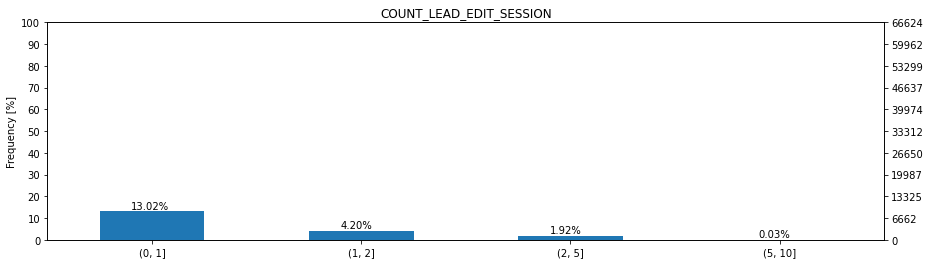

In [60]:
plt.figure(figsize = (15, 4))
plt.title('COUNT_LEAD_EDIT_SESSION')
plt.ylabel('Frequency [%]')

ax = (df.COUNT_LEAD_EDIT_SESSION_BIN.value_counts()/len(df)*100).sort_index().plot(kind = "bar", rot = 0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

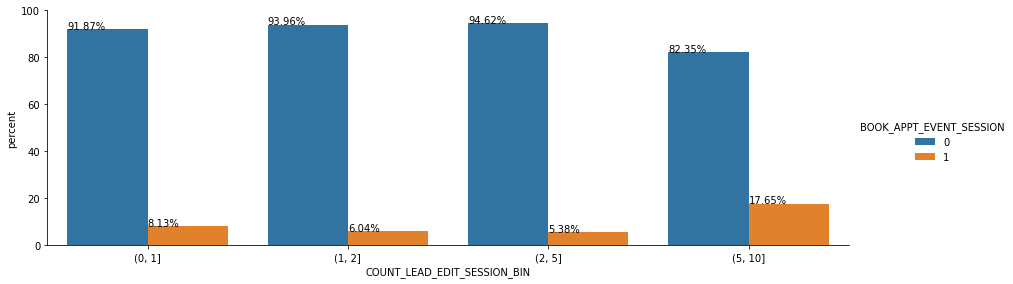

In [61]:
x, y = 'COUNT_LEAD_EDIT_SESSION_BIN', 'BOOK_APPT_EVENT_SESSION' 
df1 = df.groupby('COUNT_LEAD_EDIT_SESSION_BIN')['BOOK_APPT_EVENT_SESSION'].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = x, y = 'percent', hue = y, kind = 'bar', data = df1, height = 4, aspect = 3)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

## C2C PAGE VISIT

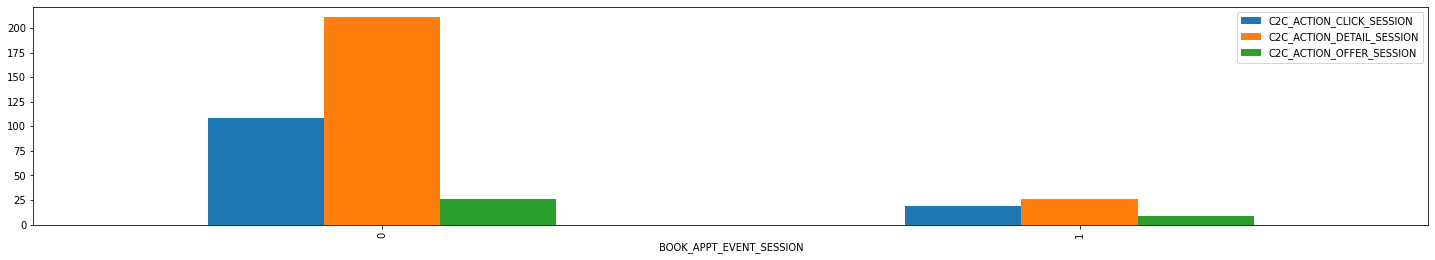

In [62]:
d = df[['BOOK_APPT_EVENT_SESSION', 'C2C_ACTION_CLICK_SESSION', 'C2C_ACTION_DETAIL_SESSION', 'C2C_ACTION_OFFER_SESSION']].groupby(['BOOK_APPT_EVENT_SESSION']).sum() 
d.plot.bar()

plt.show()



## APPOINTMENT: BRANCH, INSPECTION TYPE, DATE SELECTION

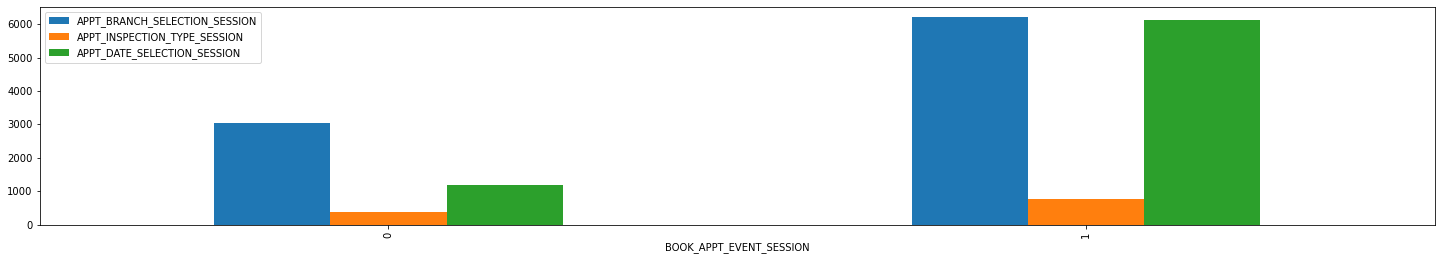

In [63]:
d1 = df[['BOOK_APPT_EVENT_SESSION', 'APPT_BRANCH_SELECTION_SESSION', 'APPT_INSPECTION_TYPE_SESSION', 'APPT_DATE_SELECTION_SESSION']].groupby(['BOOK_APPT_EVENT_SESSION']).sum() 
d1.plot.bar()

plt.show()

In [64]:
cut_bins = [0, 2, 5, 10, 14, 17, 19, 21, 24]
df['HOUR_BIN'] = pd.cut(df['HOUR'], bins = cut_bins)

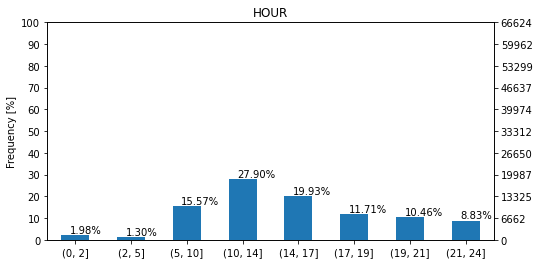

In [65]:
plt.figure(figsize = (8,4))
plt.title('HOUR')
plt.ylabel('Frequency [%]')

ax = (df.HOUR_BIN.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

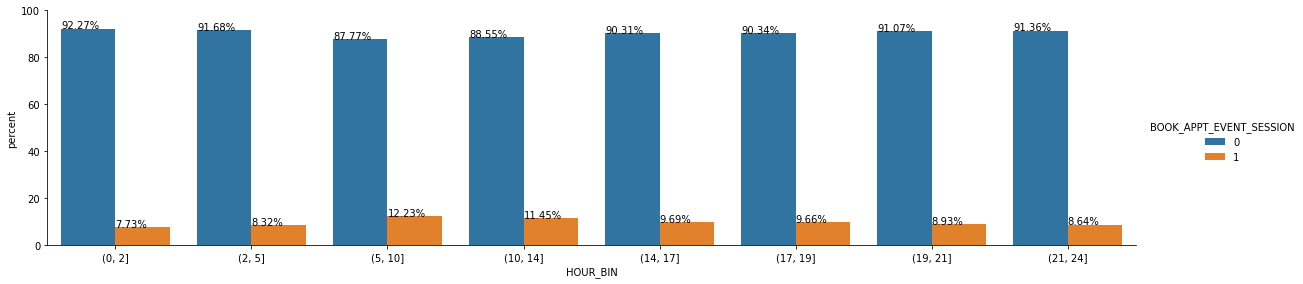

In [66]:
x, y = 'HOUR_BIN', 'BOOK_APPT_EVENT_SESSION' 
df1 = df.groupby('HOUR_BIN')['BOOK_APPT_EVENT_SESSION'].value_counts(normalize = True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = x, y = 'percent',hue = y, kind = 'bar', data = df1, height = 4, aspect = 4)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [67]:
df['HOUR_BIN'] = pd.cut(df['HOUR'], bins = cut_bins, labels = ['cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8'])

In [68]:
df = df.drop(['VISIT_ID', 'VISITOR_ID', 'APPT_PROB', 'BOOK_APPT_COUNT', 'APPT_BRANCH_SELECTION_SESSION', 'APPT_INSPECTION_TYPE_SESSION', 'APPT_DATE_SELECTION_SESSION', 'APPT_CONFIRM_BOOKING_SESSION', 'CONFIRM_APPT_EVENT_SESSION', 'TOTAL_SCREENVIEWS', 'TOTAL_UNIQUE_SCREENVIEWS', 'TOTAL_TIME_ON_SCREEN', 'TOTAL_NO_OF_VISITS_BIN', 'TOTAL_PAGEVIEWS_BIN', 'TOTAL_TIME_ON_SITE_BIN', 'MEAN_TIME_PER_PAGE_SESSION_BIN', 'COUNT_LEAD_CREATED_SESSION_BIN', 'COUNT_LEAD_EDIT_SESSION_BIN'], axis = 1) 

In [69]:
df['HOUR_BIN'] = df['HOUR_BIN'].astype('object')

In [70]:
categorical = ['CHANNEL_GROUPING', 'HOUR_BIN', 'TRAFFIC_SOURCE_SOURCE', 'TRAFFIC_SOURCE_MEDIUM']

In [71]:
encoder = ce.BinaryEncoder(categorical)
enc = encoder.fit(df[categorical].values)
dfbin = enc.transform(df[categorical].values)
print(dfbin)
df = pd.concat([df, dfbin], axis = 1)

       0_0  0_1  0_2  0_3  1_0  1_1  1_2  1_3  1_4  2_0  ...  2_6  2_7  3_0  \
0        0    0    0    1    0    0    0    0    1    0  ...    0    1    0   
1        0    0    1    0    0    0    0    1    0    0  ...    1    0    0   
2        0    0    1    0    0    0    0    1    0    0  ...    1    1    0   
3        0    0    1    0    0    0    0    0    1    0  ...    1    0    0   
4        0    0    1    0    0    0    0    1    0    0  ...    1    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
66619    0    0    0    1    0    0    1    1    0    0  ...    1    0    0   
66620    0    0    1    1    0    0    0    1    1    0  ...    1    0    0   
66621    0    0    0    1    0    0    0    0    1    0  ...    0    1    0   
66622    0    0    0    1    0    0    0    1    1    0  ...    1    0    0   
66623    0    0    1    0    0    0    0    1    1    0  ...    1    0    0   

       3_1  3_2  3_3  3_4  3_5  3_6  3_7  
0       

In [72]:
joblib.dump(enc, 'enc.pkl')

['enc.pkl']

In [73]:
df = df.dropna()
df.columns[df.isnull().any()]

Index([], dtype='object')

In [74]:
df.to_csv('model_data.csv', index = False)